In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import gym
import trading_env

import os
import agent 
from os import __file__

In [2]:
env = gym.make('trading-v0')
env_trading = gym.make('test_trading-v0')

Loading historical data file


In [3]:
rewards = []
portfolio = []
while True:
    action = np.array([0.5]) #Holding
    s, r, done, _ = env_trading.step(action)
    
    rewards.append(r)
    portfolio.append(env_trading.portfolio_value)
    if done:
        break
print(np.array(s).shape)

(100, 2)


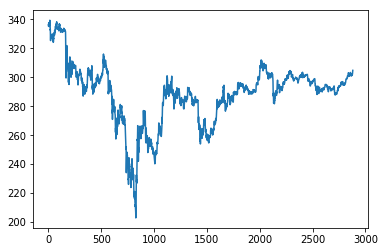

In [4]:
plt.plot(portfolio)
plt.show()

In [5]:
a = agent.StochasticPolicyGradientAgent(env_trading)

1


In [12]:
al = a.act(s)
al.shape
print(al)

[ 0.94760668]


In [18]:
env_trading.observation_space.shape
env_trading.historical_data.iloc[env_trading.historical_data.shape[0]-1]

time      2018-02-28 23:45:00
low                    848.21
high                   850.31
open                   850.31
close                  849.99
volume                1332.64
Name: 40549, dtype: object